In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg' # plots look nicer in svg
%matplotlib inline
sns.set()
pd.options.display.max_colwidth = 160

In [ ]:
path = '/content/drive/My Drive/KUBIG/2023_winter/NLP/'
train = pd.read_csv(path + 'train.csv', index_col=0) # index 컬럼 생성 X
test = pd.read_csv(path + 'test_x.csv', index_col=0)

In [ ]:
print(train.shape)
print(test.shape)

(54879, 2)
(19617, 1)


In [ ]:
train

,text,author
index,,
0,"He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, whe...",1
3,"The captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. He turned and spoke to us, “Doctor's w...",4
4,"“Have mercy, gentlemen!” odin flung up his hands. “Don’t write that, anyway; have some shame. Here I’ve torn my heart asunder before you, and you seize the ...",3
...,...,...
54874,"“Is that you, Mr. Smith?” odin whispered. “I hardly dared hope that you would come.”",2
54875,"I told my plan to the captain, and between us we settled on the details of its accomplishment.",4
54876,"""Your sincere well-wisher, friend, and sister, ""LUCY odin.",1


In [ ]:
# 출력할 컬럼의 길이 지정
pd.set_option('max_colwidth', 200)
train.head()

,text,author
index,,
0,"He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; lo...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, when, instead of being again surprised by M...",1
3,"The captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. He turned and spoke to us, “Doctor's watch on the lookout. Dr. odin take the n...",4
4,"“Have mercy, gentlemen!” odin flung up his hands. “Don’t write that, anyway; have some shame. Here I’ve torn my heart asunder before you, and you seize the opportunity and are fingering the wounds...",3


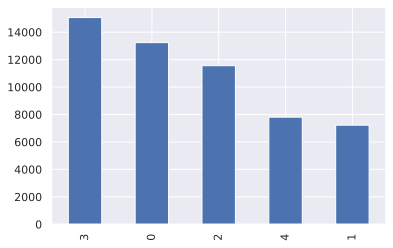

In [ ]:
# 작가별 문장 수
train['author'].value_counts().plot(kind='bar')

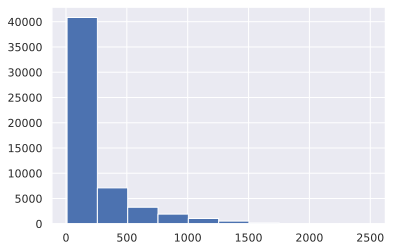

In [ ]:
# 문장 길이 분포
train['text'].str.len().hist()

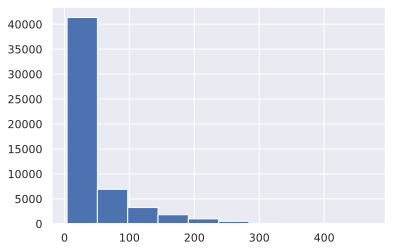

In [ ]:
# word level length (단어 기준 길이 분포)
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    #text.str.split().map(lambda x: len(x)).hist() 와 동일

plot_word_number_histogram(train['text'])

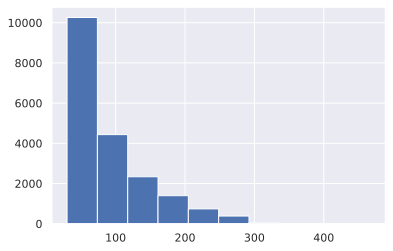

In [ ]:
# test 단어 길이 분포
plot_word_number_histogram(test['text'])

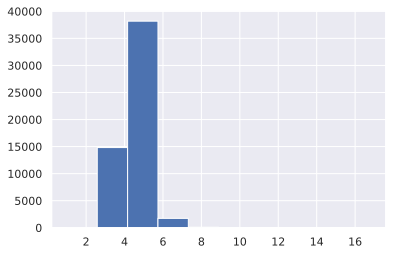

In [ ]:
# 평균 단어 길이
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

plot_word_length_histogram(train['text'])   

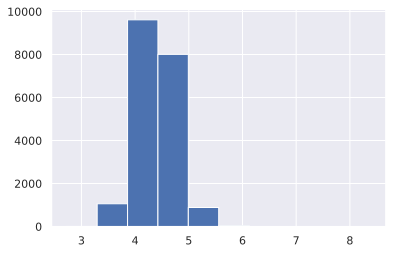

In [ ]:
# test 평균 단어 길이
plot_word_length_histogram(test['text']) 

### 전처리
nltk 대신 spacy 사용

In [ ]:
import spacy
import nltk

In [ ]:
nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words

print(len(stopwords))
print(stopwords)

326
{'she', '’s', 'hereafter', 'nothing', 'quite', 'never', 'just', 'once', 'ours', 'from', 'indeed', 'namely', 'fifty', 'move', '‘m', 'least', 'last', 'wherever', 'whoever', 'and', 'whither', 'her', 'almost', 'sometimes', 'became', 'on', 'at', 'be', 'both', 'sometime', 'which', 'used', 'afterwards', 'thereby', 'herein', 'such', 'herself', 'thru', 'ca', 'the', 'could', 'everyone', 'if', 'yours', 'in', 'back', 'down', 'four', 'front', '‘ll', 'whole', 'were', 'will', 'unless', 'over', 'same', 'too', '’d', 'moreover', 'become', 'during', 'per', 'ten', 'throughout', 'off', 'thence', 'amount', 'forty', 'often', 'would', 'bottom', 'further', 'noone', 'was', 'above', 'really', 'have', 'he', 'ourselves', 'because', 'whether', 'across', 'what', 'whereupon', 'others', '‘d', 'myself', 'this', 'something', 'why', 'must', "'s", 'its', 'whom', 'without', 'after', 'side', 'beyond', 'for', 'it', 'put', "'re", 'two', 'formerly', 'since', 'more', 'meanwhile', 'alone', 'or', 'an', 'somehow', 'wherein', '

In [ ]:
# stop words 목록 추가
stopwords.add("'s")
for word in stopwords:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = True

In [ ]:
def replace_ents(doc):
    prefix = 'ent__'
    text = str(doc.doc)
    for ent in doc.ents:
        text = text.replace(ent.orth_, prefix + ent.label_)
    return text

In [ ]:
def preprocess(df):
    print('Started parsing...')
    doc = df.text.apply(nlp)
    print('Text parsed')
    
    # 문장 길이
    df['n_char']   = df.text.apply(len)
    # 문장 부호 제외 나머지의 길이
    df['n_words']  = doc.apply(lambda x: len([t for t in x if not t.is_punct]))
    # 문장 부호만의 길이
    df['n_punct']  = doc.apply(lambda x: len([t for t in x if t.is_punct]))
    # 개체명의 길이
    df['n_ents']   = doc.apply(lambda x: len(x.ents))
    # 명사구 길이
    df['n_chunks'] = doc.apply(lambda x: len(list(x.noun_chunks)))
    # 문장 부호 제외, 중복 제거 길이
    df['n_unique_words'] = doc.apply(lambda x: len(set([t.lower_ for t in x if not t.is_punct])))
    # 불용어의 길이
    df['n_stop_words']   = doc.apply(lambda x: len([t for t in x if t.is_stop]))
    df['char_by_word']   = doc.apply(lambda x: np.mean([len(t.orth_) for t in x if not t.is_punct]))
    print('Features created')
    
    df['text_ent_repl'] = doc.apply(replace_ents)
    print('Entities replaced')
    
    clean_and_lemmatize = lambda x: ' '.join([t.lemma_ for t in x if not t.is_punct and not t.is_stop])
    df['text_cleaned'] = doc.apply(clean_and_lemmatize)
    print('Text cleaned')

In [ ]:
%%time
preprocess(train)

Started parsing...
Text parsed
Features created
Entities replaced
Text cleaned
CPU times: user 10min 23s, sys: 1.76 s, total: 10min 25s
Wall time: 10min 28s


In [ ]:
%%time
preprocess(test)

### Visualization

In [ ]:
zero = train.loc[train['author'] == 0]
one = train.loc[train['author'] == 1]
two = train.loc[train['author'] == 2]
three = train.loc[train['author'] == 3]
four = train.loc[train['author'] == 4]

zero_t = zero.text_cleaned
one_t = one.text_cleaned
two_t = two.text_cleaned
three_t = three.text_cleaned
four_t = four.text_cleaned

In [ ]:
# 단어(토큰) 사용 빈도
fd = nltk.FreqDist([y for x in train.text_cleaned.str.split() for y in x])

fd_zero = nltk.FreqDist([y for x in zero_t.str.split() for y in x])
fd_one = nltk.FreqDist([y for x in one_t.str.split() for y in x])
fd_two = nltk.FreqDist([y for x in two_t.str.split() for y in x])
fd_three = nltk.FreqDist([y for x in three_t.str.split() for y in x])
fd_four = nltk.FreqDist([y for x in four_t.str.split() for y in x])

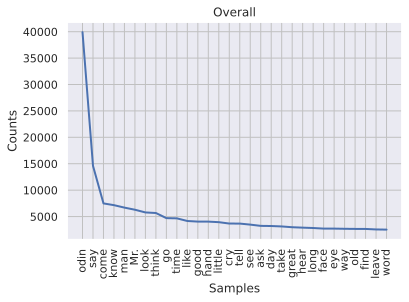

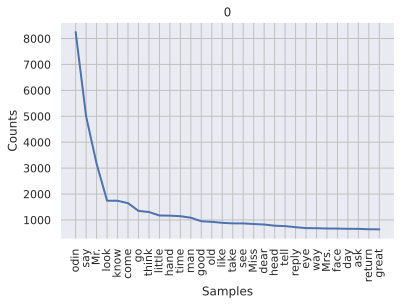

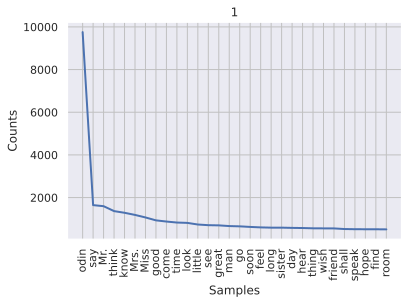

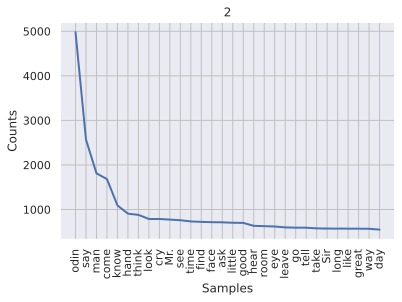

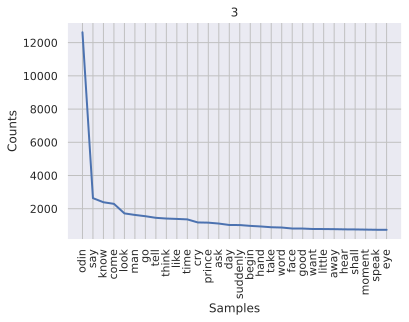

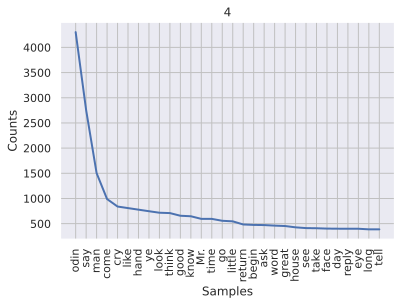

In [ ]:
fd.plot(30, title='Overall')
fd_zero.plot(30, title='0')
fd_one.plot(30, title='1')
fd_two.plot(30, title='2')
fd_three.plot(30, title='3')
fd_four.plot(30, title='4')

#### Meta-features distributions

In [ ]:
sns.set()

In [ ]:
def drop_outliers(s):
    med = s.mean()
    std = s.std()
    return s[(med - 3*std <= s) & (s <= med + 3*std)]

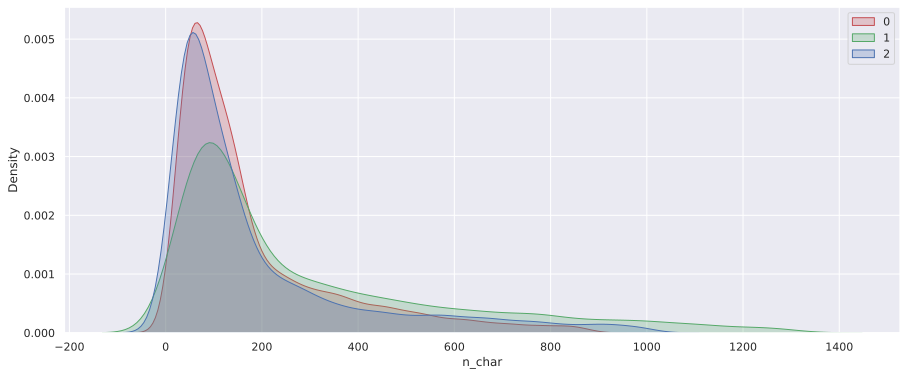

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(drop_outliers(zero.n_char), shade=True, color="r");
sns.kdeplot(drop_outliers(one.n_char), shade=True, color="g");
sns.kdeplot(drop_outliers(two.n_char), shade=True, color="b");
ax.legend(labels=['0', '1', '2']);

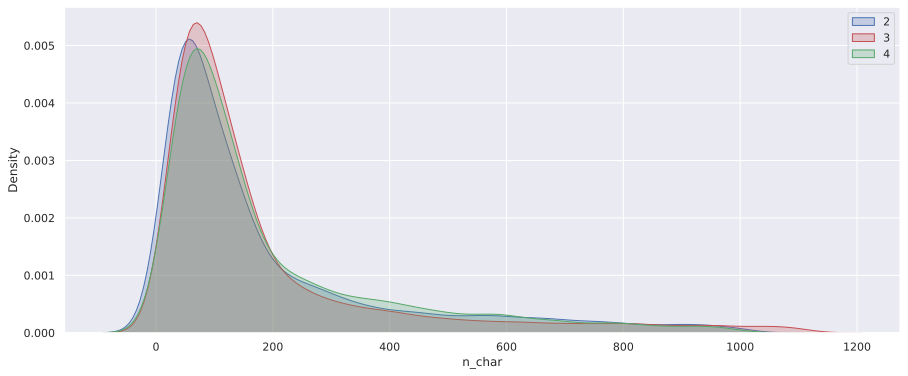

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(drop_outliers(two.n_char), shade=True, color="b");
sns.kdeplot(drop_outliers(three.n_char), shade=True, color="r");
sns.kdeplot(drop_outliers(four.n_char), shade=True, color="g");
ax.legend(labels=['2', '3', '4']);

문장 길이 측면에서 1번 작가의 분포가 다른 양상을 보인다.

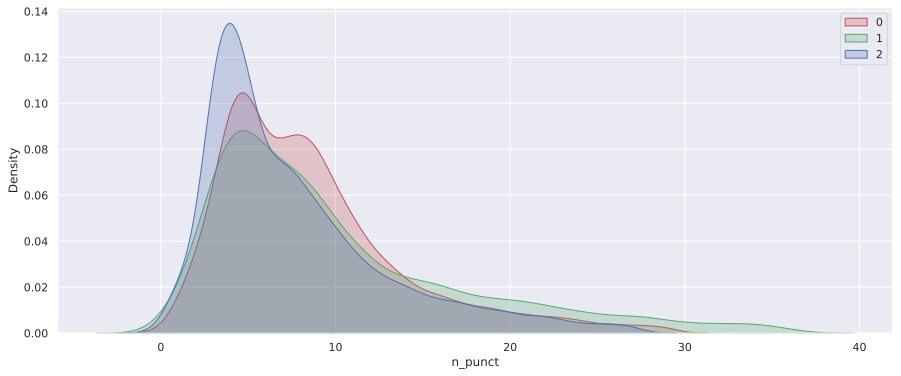

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(drop_outliers(zero.n_punct), shade=True, color="r");
sns.kdeplot(drop_outliers(one.n_punct), shade=True, color="g");
sns.kdeplot(drop_outliers(two.n_punct), shade=True, color="b");
ax.legend(labels=['0', '1', '2']);

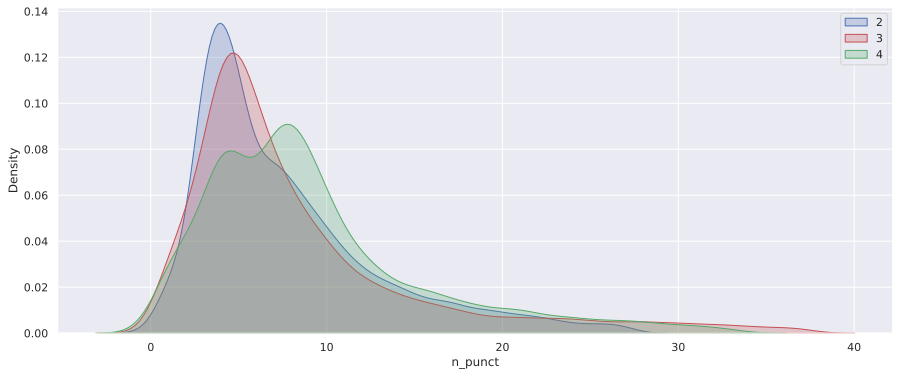

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
sns.kdeplot(drop_outliers(two.n_punct), shade=True, color="b");
sns.kdeplot(drop_outliers(three.n_punct), shade=True, color="r");
sns.kdeplot(drop_outliers(four.n_punct), shade=True, color="g");
ax.legend(labels=['2', '3', '4']);

### Models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

In [ ]:
y = train['author']

#### CountVect + untouched text

In [ ]:
vectorizer = CountVectorizer(
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2), stop_words='english'
)
X = vectorizer.fit_transform(train['text'])

In [ ]:
%%time
scores = cross_val_score(LogisticRegression(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 0.725 +- 0.036
CPU times: user 3.11 s, sys: 741 ms, total: 3.85 s
Wall time: 9min 1s


In [ ]:
%%time
scores = cross_val_score(MultinomialNB(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 1.039 +- 0.077
CPU times: user 72 ms, sys: 27 ms, total: 99.1 ms
Wall time: 1.34 s


로지스틱 회귀와 NB를 단순 적용한 것만으로는 결과가 좋지 않다.

#### CountVect + cleaned text

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2)) # 단어 묶음 1~2개
X = vectorizer.fit_transform(train.text_cleaned)

In [ ]:
%%time
scores = cross_val_score(LogisticRegression(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 0.753 +- 0.032
CPU times: user 2.61 s, sys: 413 ms, total: 3.02 s
Wall time: 7min 30s


In [ ]:
%%time
scores = cross_val_score(MultinomialNB(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 1.020 +- 0.068
CPU times: user 70.9 ms, sys: 17 ms, total: 87.9 ms
Wall time: 1.27 s


#### CountVect + replaced entities text

In [ ]:
vectorizer = CountVectorizer(token_pattern=r'\w{1,}', stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(train.text_ent_repl)

In [ ]:
%%time
scores = cross_val_score(LogisticRegression(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 0.831 +- 0.035
CPU times: user 2.72 s, sys: 419 ms, total: 3.14 s
Wall time: 7min 59s


In [ ]:
%%time
scores = cross_val_score(MultinomialNB(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 1.272 +- 0.084
CPU times: user 76.9 ms, sys: 14.1 ms, total: 91 ms
Wall time: 1.43 s


Seems like replacing named entities doesn't help

#### TF-IDF + cleaned text

In [ ]:
vectorizer = TfidfVectorizer(
    token_pattern=r'\w{1,}', ngram_range=(1, 1), 
    use_idf=True, smooth_idf=True, sublinear_tf=True,
)
X = vectorizer.fit_transform(train.text_cleaned)

In [ ]:
%%time
scores = cross_val_score(LogisticRegression(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 0.804 +- 0.018
CPU times: user 265 ms, sys: 53.3 ms, total: 318 ms
Wall time: 38.7 s


In [ ]:
%%time
scores = cross_val_score(MultinomialNB(), X, y, cv=10, n_jobs=-1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 0.923 +- 0.016
CPU times: user 56.3 ms, sys: 11 ms, total: 67.3 ms
Wall time: 356 ms


tfidf는 simple count vect에 비해 약간 향상된 결과를 보였다.

#### Only meta-features

In [ ]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
drop = ['text', 'text_cleaned', 'text_ent_repl']

In [ ]:
X_meta = train.drop(drop + ['author'], axis=1)

In [ ]:
%%time
lgbc = lgb.LGBMClassifier(objective='multiclass', n_estimators=100)
scores = cross_val_score(lgbc, X_meta, y, cv=4, n_jobs=1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 1.460 +- 0.004
CPU times: user 11.2 s, sys: 125 ms, total: 11.3 s
Wall time: 11.4 s


In [ ]:
%%time
xgbc = xgb.XGBClassifier(objective='multi:softprob', n_estimators=200)
scores = cross_val_score(xgbc, X_meta, y, cv=4, n_jobs=4, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 1.474 +- 0.004
CPU times: user 304 ms, sys: 151 ms, total: 455 ms
Wall time: 52.2 s


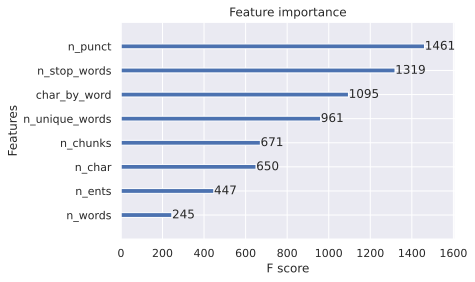

In [ ]:
xgbc.fit(X_meta, y);
xgb.plot_importance(xgbc);

### Stack 'em

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [ ]:
def add_prob_features(vectorizer, col, model, prefix, cv=5):
    vectorizer.fit(train[col].append(test[col]))
    X = vectorizer.transform(train[col])
    X_test = vectorizer.transform(test[col])
    
    cv_scores = []
    pred_test = 0
    pred_train = np.zeros([train.shape[0], 5])
    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=123)
    
    print('CV started')
    for train_index, dev_index in kf.split(X, y):
        X_train, X_dev = X[train_index], X[dev_index]
        y_train, y_dev = y[train_index], y[dev_index]
        
        model.fit(X_train, y_train)
        pred_dev   = model.predict_proba(X_dev)
        pred_test += model.predict_proba(X_test)
    
        pred_train[dev_index, :] = pred_dev
        cv_scores.append(metrics.log_loss(y_dev, pred_dev))
        print('.', end='')
        
    print('')
    print("Mean CV LogLoss: %.3f" % (np.mean(cv_scores)))
    pred_test /= cv

    train[prefix+'0'] = pred_train[:, 0]
    train[prefix+'1'] = pred_train[:, 1]
    train[prefix+'2'] = pred_train[:, 2]
    train[prefix+'3'] = pred_train[:, 3]
    train[prefix+'4'] = pred_train[:, 4]
    
    test[prefix+'0'] = pred_test[:, 0]
    test[prefix+'1'] = pred_test[:, 1]
    test[prefix+'2'] = pred_test[:, 2]
    test[prefix+'3'] = pred_test[:, 3]
    test[prefix+'4'] = pred_test[:, 4]

In [ ]:
vectorizer = CountVectorizer(
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2), stop_words='english'
)
add_prob_features(vectorizer, 'text', MultinomialNB(), 'nb_ctv_', cv=40)

CV started
........................................
Mean CV LogLoss: 1.149


In [ ]:
vectorizer = TfidfVectorizer(
    token_pattern=r'\w{1,}', ngram_range=(1, 1), 
    use_idf=True, smooth_idf=True, sublinear_tf=True,
)
add_prob_features(vectorizer, 'text_cleaned', MultinomialNB(), 'nb_tfv_', cv=40)

CV started
........................................
Mean CV LogLoss: 0.916


In [ ]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 5), analyzer='char'
)
add_prob_features(vectorizer, 'text', MultinomialNB(), 'nb_char_', cv=40)

CV started
........................................
Mean CV LogLoss: 1.678


In [ ]:
vectorizer = CountVectorizer(
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2), stop_words='english'
)
add_prob_features(vectorizer, 'text_ent_repl', MultinomialNB(), 'nb_ent_', cv=40)

CV started
........................................
Mean CV LogLoss: 1.417


In [ ]:
X = train.drop(drop + ['author'], axis=1)

In [ ]:
%%time
lgbc = lgb.LGBMClassifier(objective='multiclass', n_estimators=150, num_leaves=10)
scores = cross_val_score(lgbc, X, y, cv=4, n_jobs=1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 0.486 +- 0.015
CPU times: user 25.4 s, sys: 112 ms, total: 25.5 s
Wall time: 25.5 s


In [ ]:
%%time
xgbc = xgb.XGBClassifier(objective='multi:softprob', n_estimators=150)
scores = cross_val_score(xgbc, X, y, cv=4, n_jobs=1, scoring='neg_log_loss')
print('LogLoss: %.3f +- %.3f' % (-np.mean(scores), 2*np.std(scores)))

LogLoss: 0.494 +- 0.015
CPU times: user 3min 11s, sys: 314 ms, total: 3min 11s
Wall time: 3min 11s


LogLoss가 0.494로 약 61%의 확률로 예측했음을 알 수 있다.

In [ ]:
%%time
xgbc.fit(X, y);

CPU times: user 1min 3s, sys: 103 ms, total: 1min 3s
Wall time: 1min 3s


XGBClassifier(n_estimators=150, objective='multi:softprob')

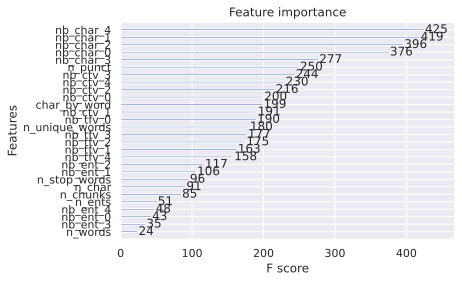

In [ ]:
xgb.plot_importance(xgbc);

### nltk 활용

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') # 불용어 리스트
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


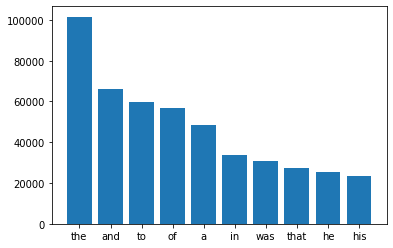

In [ ]:
# stopwords 분포
from collections import defaultdict

def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i] # 이중 반복문 한 줄로 표현

    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1
            
    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10] 
    x, y = zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train['text'])    

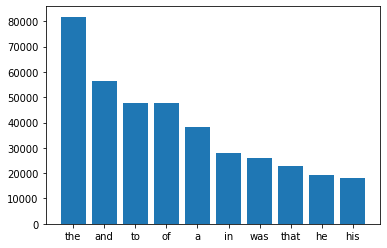

In [ ]:
plot_top_stopwords_barchart(test['text'])    

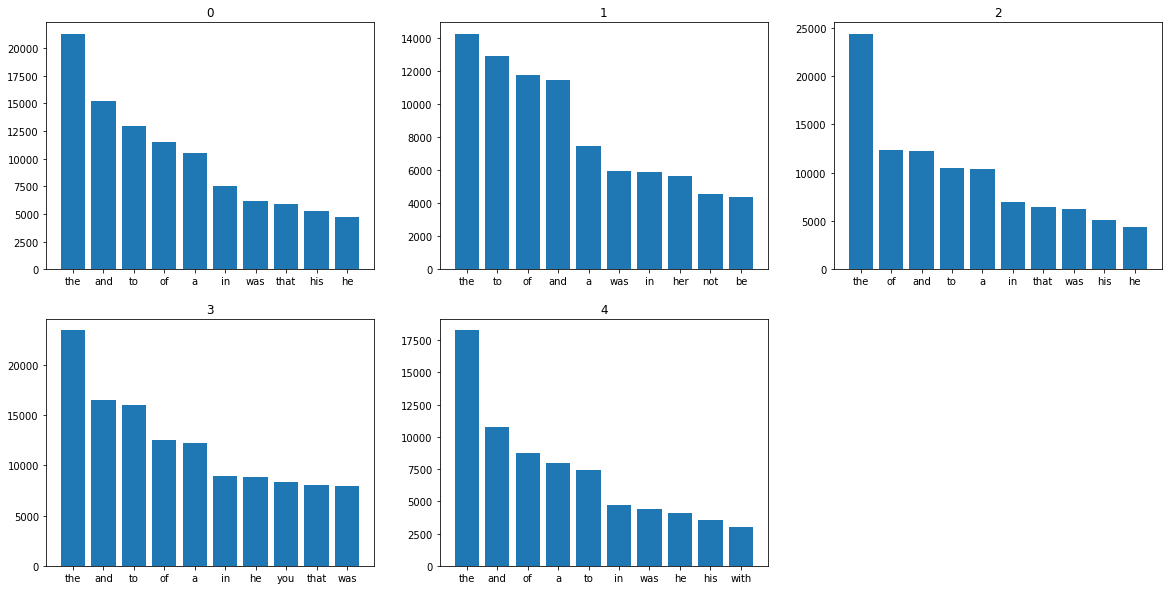

In [ ]:
fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    return x, y

for i in range(5):
    x,y = plot_top_stopwords_barchart2(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    ax.bar(x,y)

In [ ]:
import seaborn as sns
from collections import  Counter

In [ ]:
train['text_l'] = train['text'].str.lower() 
test['text_l'] = test['text'].str.lower() 

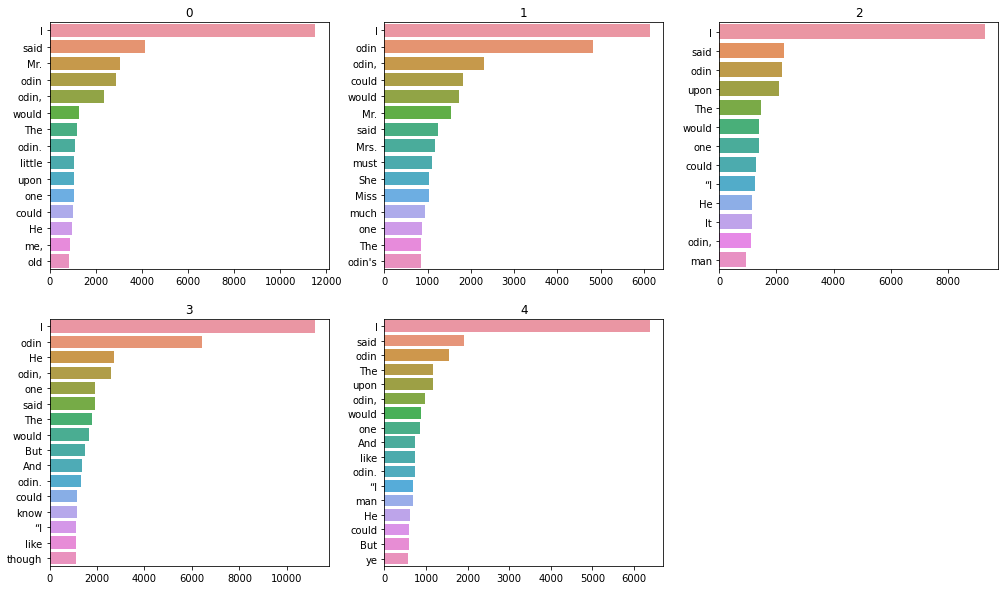

In [ ]:
fig = plt.figure(figsize=(17,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

def plot_top_non_stopwords_barchart3(text):
    stop=set(stopwords.words('english'))
    #stop.add(('odin', 'odin,', 'odin.'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:70]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart3(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

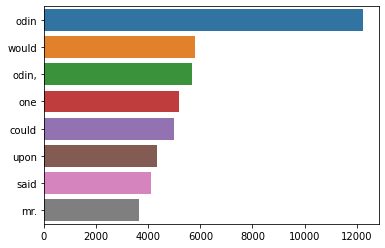

In [ ]:
x,y = plot_top_non_stopwords_barchart3(test['text_l'])
sns.barplot(x=y,y=x)

### Ngram exploration

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

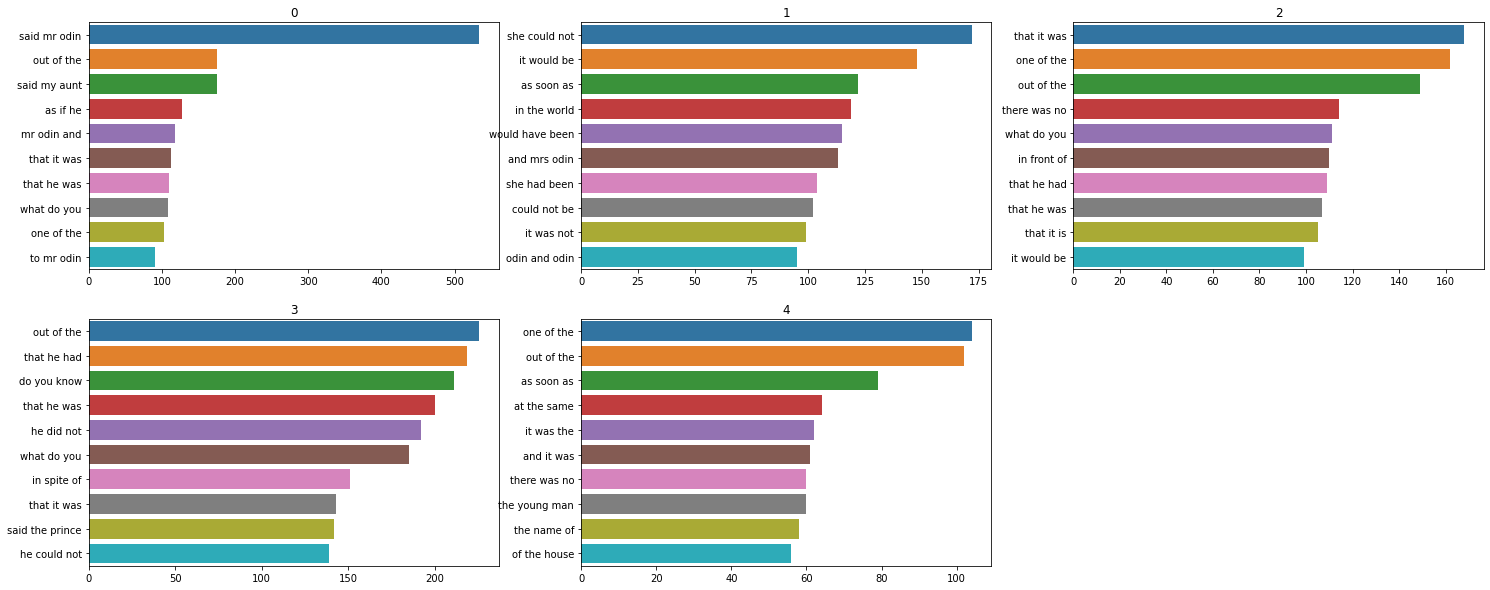

In [ ]:
fig = plt.figure(figsize=(25,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

# 작가별 빈출 어구
def plot_top_ngrams_barchart2(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    
    return x, y

for i in range(5):
    x,y = plot_top_ngrams_barchart2(train[train['author']==i]['text_l'], n=3)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

In [ ]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score = text.apply(lambda x : _polarity(x))
    return polarity_score

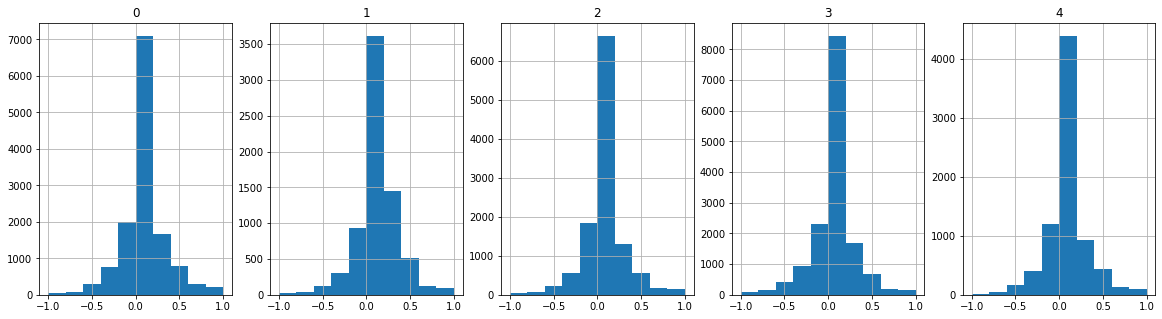

In [ ]:
fig = plt.figure(figsize=(20,5)) # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 5

for i in range(5):
    polarity_score = plot_polarity_histogram(train[train['author']==i]['text_l'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    polarity_score.hist()